In [ ]:
#Description: This program uses an artifical recurrent neural network called Long Short Term Memory (LSTM)
#to predict the closing stock price of a corporation (Netflix Inc.) using the past 60 day stock price. 

In [ ]:
#Import the libraries
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote 
df = web.DataReader('NFLX', data_source = 'yahoo', start ='2015-01-01', end='2020-10-5')
#show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,50.331429,48.731430,49.151428,49.848572,13475000.0,49.848572
2015-01-05,49.258572,47.147144,49.258572,47.311428,18165000.0,47.311428
2015-01-06,47.639999,45.661430,47.347141,46.501427,16037700.0,46.501427
2015-01-07,47.421429,46.271427,47.347141,46.742859,9849700.0,46.742859
2015-01-08,47.835712,46.478573,47.119999,47.779999,9601900.0,47.779999
...,...,...,...,...,...,...
2020-09-29,496.290009,486.529999,489.500000,493.480011,3541500.0,493.480011
2020-09-30,504.630005,489.269989,492.570007,500.029999,4631100.0,500.029999
2020-10-01,529.549988,503.600006,506.029999,527.510010,8153700.0,527.510010


In [ ]:
#Get the number of rows and colums in the data set 
df. shape

(1450, 6)

Text(0, 0.5, 'Close Price USD($)')

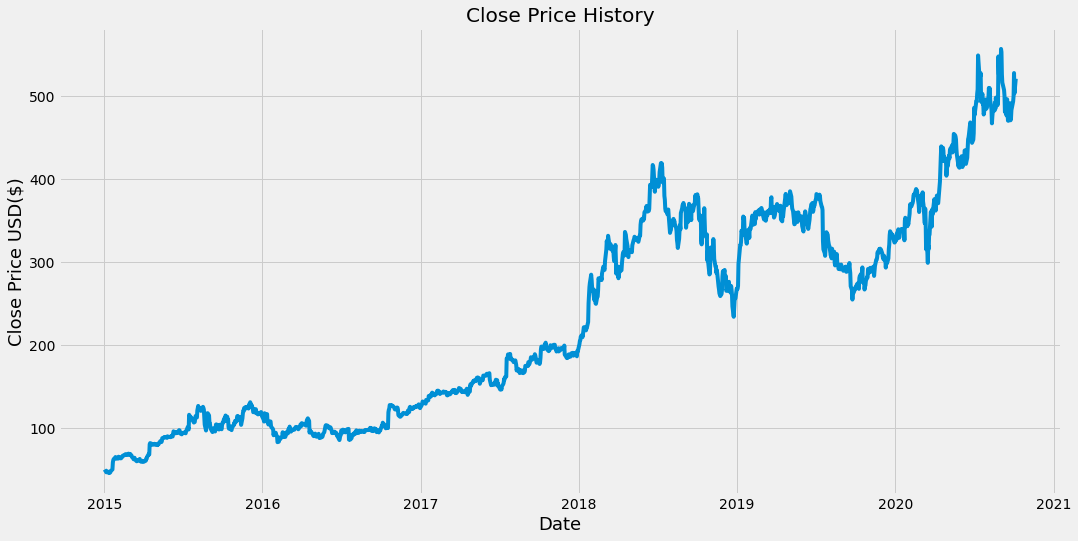

In [ ]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize=18)

In [ ]:
#Create a new dataframe with only the 'Close column
data = df. filter (['Close'])
#Convert the datframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1160

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00841762],
       [0.0034526 ],
       [0.00186747],
       ...,
       [0.94317061],
       [0.8953235 ],
       [0.92974606]])

In [ ]:
#Create the training data set 
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets 
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.00841762, 0.0034526 , 0.00186747, 0.00233994, 0.00436956,
       0.00292422, 0.        , 0.00138663, 0.00151243, 0.00137824,
       0.0051747 , 0.00837848, 0.02528641, 0.03064283, 0.03316448,
       0.0357085 , 0.03783597, 0.03456229, 0.03493691, 0.03437778,
       0.0341737 , 0.03860476, 0.03630955, 0.03636546, 0.03509346,
       0.03473283, 0.03777446, 0.03803725, 0.03855165, 0.04117115,
       0.04225026, 0.04367602, 0.04354743, 0.04455385, 0.04277584,
       0.0436257 , 0.04459019, 0.04590414, 0.04363409, 0.04512695,
       0.04357817, 0.04219714, 0.04160447, 0.03782198, 0.03544851,
       0.03249353, 0.03392768, 0.03620053, 0.03342727, 0.02883406,
       0.02786957, 0.02915555, 0.02973984, 0.03060369, 0.02968114,
       0.03339372, 0.02877256, 0.02779688, 0.02682121, 0.02900179])]
[0.02735796807810427]



In [ ]:
#convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data (LSTM model expects 3 dimension NOT 2)
x_train = np.reshape(x_train,(1100, 60, 1))
x_train.shape

(1100, 60, 1)

In [ ]:
#Build the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape =(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model 
model.fit(x_train, y_train, batch_size=1, epochs=1)

1100/1100 [==============================] - 24s 22ms/step - loss: 0.0022


In [ ]:
#Create the testing dataset
#Create a new array containing scaled values from index 1100 to 2020
test_data = scaled_data[training_data_len - 60: ,  :]
#create the data sets x_test and y_test 
x_test = []
y_Test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(  predictions - y_Test)**2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show>

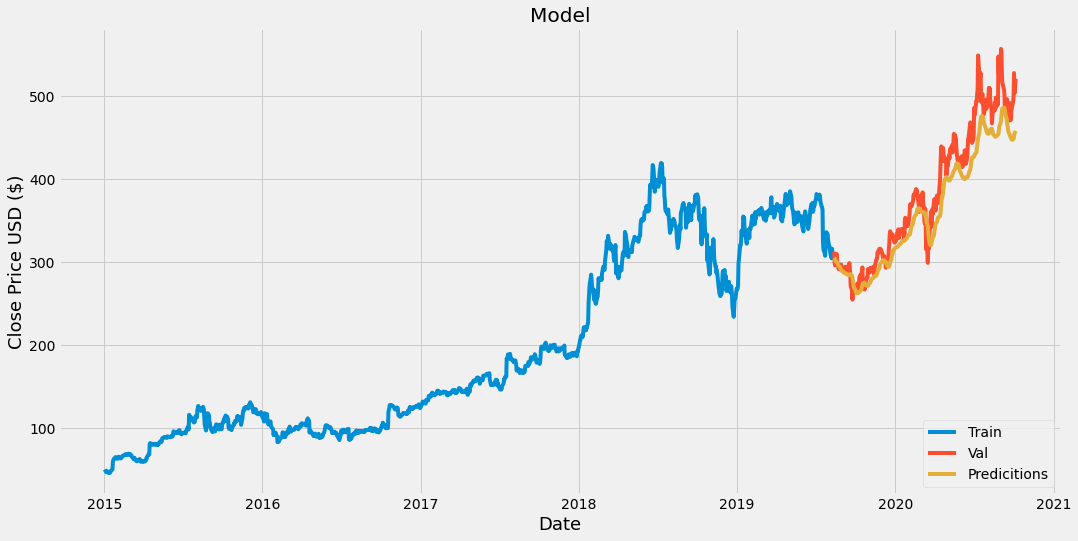

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predicitions'], loc='lower right')
plt.show